***Data Source:*** *https://www.kaggle.com/c/histopathologic-cancer-detection/data?select=train*

>>>>># ***Histopathologic Cancer Detection***


> *In this dataset we are provided with a large number of small pathology images to classify. Files are named with an image id. The train_labels.csv file provides the ground truth for the images in the train folder. We are predicting the labels for the images in the test folder. A positive label indicates that the center 32x32px region of a patch contains at least one pixel of tumor tissue. Tumor tissue in the outer region of the patch does not influence the label. This outer region is provided to enable fully-convolutional models that do not use zero-padding, to ensure consistent behavior when applied to a whole-slide image.*



In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11848/862157/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1629276055&Signature=a2b8zsNv7DBH62rpXqKQg810W362P7um8sMFau%2B5%2F%2FCovkfZ%2FpRApZ%2F0fe8847ed2Qmg32OSJZPHNhCxOE28RJDI%2B0JwPd1kPo0KffOE3LLqNWaDjDZMejPM4rzd0osG9Y1c18vGGc8J%2BMw99b8dfC48BeccJQUJrqnQ%2FzRh%2BE4iRh9MvmGtStFQAGyaQCH2sbrjlSomCCbOi9SRVSP9xZG0FN48shbuMfww4wozGUZatSxFwXk2xosTknQgDXJRDLmiFzYz5Q85SEKn9%2F%2Bd9OjM7SlYv456i9Xhux%2FrpE7RKsCUbKdIXE36IpNnNIj%2FELw%2BBgAhAvKV36DzhQY8gg%3D%3D&response-content-disposition=attachment%3B+filename%3Dhistopathologic-cancer-detection.zip" -c -O 'histopathologic-cancer-detection.zip'

--2021-08-18 05:20:04--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11848/862157/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1629276055&Signature=a2b8zsNv7DBH62rpXqKQg810W362P7um8sMFau%2B5%2F%2FCovkfZ%2FpRApZ%2F0fe8847ed2Qmg32OSJZPHNhCxOE28RJDI%2B0JwPd1kPo0KffOE3LLqNWaDjDZMejPM4rzd0osG9Y1c18vGGc8J%2BMw99b8dfC48BeccJQUJrqnQ%2FzRh%2BE4iRh9MvmGtStFQAGyaQCH2sbrjlSomCCbOi9SRVSP9xZG0FN48shbuMfww4wozGUZatSxFwXk2xosTknQgDXJRDLmiFzYz5Q85SEKn9%2F%2Bd9OjM7SlYv456i9Xhux%2FrpE7RKsCUbKdIXE36IpNnNIj%2FELw%2BBgAhAvKV36DzhQY8gg%3D%3D&response-content-disposition=attachment%3B+filename%3Dhistopathologic-cancer-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 64.233.167.128, 64.233.166.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6773228425 (6.3G) [application/zip]
Saving to: ‘histop

In [ ]:
!unzip histopathologic-cancer-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/fa2c546059bd262cbe954dfdba24dc0d67f598b0.tif  
  inflating: train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: train/fa2ebf31ff5954570526d4835ac5368fabc1f035.tif  
  inflating: train/fa2efd2dda5235a3e397ea0dd637ea13a78f7599.tif  
  inflating: train/fa2f1d

>>>>>>>># ***Data Preparation***

*Importing the basic libraries*

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import imgaug.augmenters as iaa
import tensorflow as tf
import shutil

*Reading the data*

In [ ]:
df = pd.read_csv('train_labels.csv')
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


*Plotting the first five images in the train data*

Label:  0


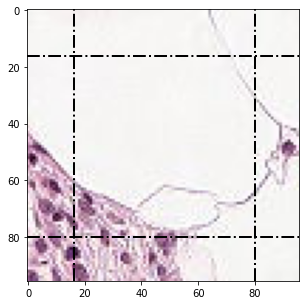

####################################################################################################
Label:  1


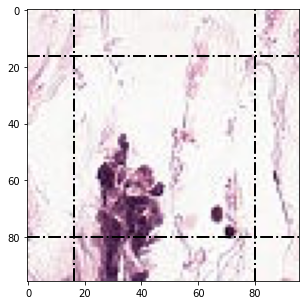

####################################################################################################
Label:  0


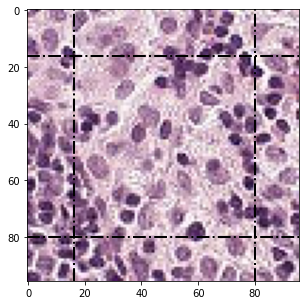

####################################################################################################
Label:  0


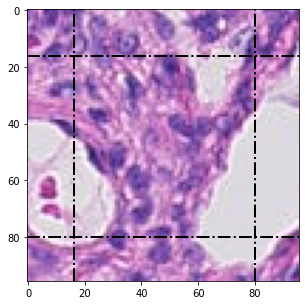

####################################################################################################
Label:  0


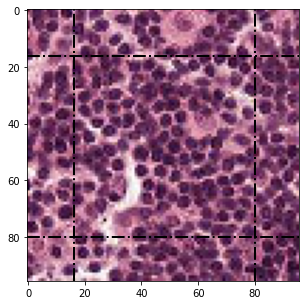

####################################################################################################


In [ ]:
k = 0
for i in df['id'].head():
    plt.figure(figsize = (5, 5))
    print('Label: ', df['label'].head().iloc[k])
    image = Image.open('train/' + i + '.tif')
    plt.imshow(image)
    plt.axhline(16, lw = 2, color = 'black', ls = '-.')
    plt.axhline(64 + 16, lw = 2, color = 'black', ls = '-.')
    plt.axvline(16, lw = 2, color = 'black', ls = '-.')
    plt.axvline(64 + 16, lw = 2, color = 'black', ls = '-.')
    plt.show()
    print('#'*100)
    k += 1

*Dimensions of Image*

In [ ]:
np.array(image).shape

(96, 96, 3)

*Plotting the distribution of the Output variable*

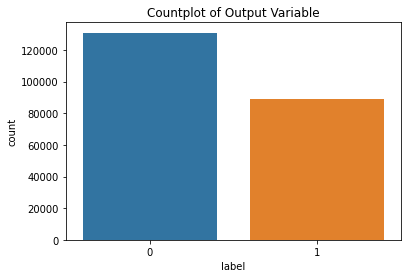

Percentage of Data points belonging to each class:
0    59.497
1    40.503
Name: label, dtype: float64


In [ ]:
plt.title('Countplot of Output Variable')
sns.countplot(df['label'])
plt.show()
print('Percentage of Data points belonging to each class:')
print(round(100*(df['label'].value_counts()/df['label'].value_counts().sum()), 3))

*Splitting the data into train, test and validation data*

In [ ]:
df_train, df_val = train_test_split(df, test_size = 0.20, stratify = df['label'])

*Seperating the data into train, test and validation folder*

In [ ]:
os.mkdir('data')

os.mkdir('data/train')
os.mkdir('data/train/1')
os.mkdir('data/train/0')

os.mkdir('data/validation')
os.mkdir('data/validation/1')
os.mkdir('data/validation/0')

os.mkdir('data/test')

In [ ]:
def seperate_data(df, dir):
    for i in range(len(df)):
        image_path = 'train/' + df['id'].iloc[i] + '.tif'
        if df['label'].iloc[i] == 1:
            shutil.move(image_path, 'data/' + dir + '/1')
        else:
            shutil.move(image_path, 'data/' + dir + '/0')

In [ ]:
seperate_data(df_train, 'train')

In [ ]:
seperate_data(df_val, 'validation')

In [ ]:
shutil.move('test', 'data/test')

'data/test/test'

In [ ]:
from skimage import color, io
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)

In [ ]:
train_generator = image_generator.flow_from_directory(directory = 'data/train',
                                                      target_size = (96, 96),
                                                      batch_size = 128,
                                                      class_mode = 'binary',
                                                      shuffle = True,
                                                      seed = 42)

val_generator = image_generator.flow_from_directory(directory = 'data/validation',
                                                    target_size = (96, 96),
                                                    batch_size = 128,
                                                    class_mode = 'binary',
                                                    shuffle = True,
                                                    seed = 42)

test_generator = image_generator.flow_from_directory(directory = 'data/test',
                                                     target_size = (96, 96),
                                                     batch_size = 1,
                                                     class_mode = None,
                                                     shuffle = False,
                                                     seed = 42)

Found 176020 images belonging to 2 classes.
Found 44005 images belonging to 2 classes.
Found 57458 images belonging to 1 classes.


>>>>>>>># ***Model Building***

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout, Flatten
from keras.layers import *
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow

In [ ]:
image_input = Input(shape = (96, 96, 3))

conv_1 = Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(image_input)
batch_1 = BatchNormalization()(conv_1)
conv_2 = Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_1)
batch_2 = BatchNormalization()(conv_2)
max_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(batch_2)
batch_3 = BatchNormalization()(max_1)

conv_3 = Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_3)
batch_4 = BatchNormalization()(conv_3)
conv_4 = Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_4)
batch_5 = BatchNormalization()(conv_4)
max_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(batch_5)
batch_5 = BatchNormalization()(max_2)

conv_5 = Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_5)
batch_6 = BatchNormalization()(conv_5)
conv_6 = Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_6)
batch_7 = BatchNormalization()(conv_6)
conv_7 = Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_7)
batch_8 = BatchNormalization()(conv_7)
max_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(batch_7)
batch_6 = BatchNormalization()(max_3)

conv_8 = Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_6)
batch_7 = BatchNormalization()(conv_8)
conv_9 = Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_7)
batch_8 = BatchNormalization()(conv_9)
conv_10 = Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_8)
batch_9 = BatchNormalization()(conv_10)
max_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(batch_9)
batch_10 = BatchNormalization()(max_4)

conv_11 = Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_10)
batch_11 = BatchNormalization()(conv_11)
conv_12 = Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_11)
batch_12 = BatchNormalization()(conv_12)
conv_13 = Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1), kernel_initializer = 'he_normal', padding = 'same')(batch_12)
batch_13 = BatchNormalization()(conv_13)
max_5 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(batch_13)
batch_14 = BatchNormalization()(max_5)

flat_1 = Flatten()(batch_14)
dense_1 = Dense(256, activation = 'relu', kernel_initializer = 'he_normal')(flat_1)
batch_14 = BatchNormalization()(dense_1)
dropout_6 = Dropout(0.5)(batch_14)
dense_2 = Dense(128, activation = 'relu', kernel_initializer = 'he_normal')(batch_14)
batch_15 = BatchNormalization()(dense_2)
dropout_6 = Dropout(0.5)(batch_15)

output = Dense(1, activation = 'sigmoid', kernel_initializer = 'he_normal')(dropout_6)

model = Model(inputs = image_input, outputs = output)

model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 96, 96, 64)        1792      
_________________________________________________________________
batch_normalization_159 (Bat (None, 96, 96, 64)        256       
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 96, 96, 64)        36928     
_________________________________________________________________
batch_normalization_160 (Bat (None, 96, 96, 64)        256       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_161 (Bat (None, 48, 48, 64)        256 

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
history = model.fit_generator(train_generator, validation_data = val_generator, epochs = 5)

Epoch 1/5
1376/1376 [==============================] - 1155s 838ms/step - loss: 0.4142 - accuracy: 0.8196 - val_loss: 0.4951 - val_accuracy: 0.8147
Epoch 2/5
1376/1376 [==============================] - 1152s 837ms/step - loss: 0.3231 - accuracy: 0.8645 - val_loss: 0.9448 - val_accuracy: 0.6933
Epoch 3/5
1376/1376 [==============================] - 1154s 838ms/step - loss: 0.2725 - accuracy: 0.8895 - val_loss: 0.3897 - val_accuracy: 0.8461
Epoch 4/5
1376/1376 [==============================] - 1154s 838ms/step - loss: 0.2549 - accuracy: 0.8991 - val_loss: 0.6452 - val_accuracy: 0.7435
Epoch 5/5
1376/1376 [==============================] - 1154s 838ms/step - loss: 0.2443 - accuracy: 0.9036 - val_loss: 1.1741 - val_accuracy: 0.6823


In [ ]:
results = []
for i in range(len(df_val['id'])):
    if df_val['label'].iloc[i] == 0:
        image = cv2.imread('data/validation/0/' + df_val['id'].iloc[i] + '.tif')
        pred = model.predict(tf.expand_dims(image, axis = 0))
        results.append([pred, 0])
    else:
        image = cv2.imread('data/validation/1/' + df_val['id'].iloc[i] + '.tif')
        pred = model.predict(tf.expand_dims(image, axis = 0))
        results.append([pred, 1])

results = pd.DataFrame(results, columns = ['Predictions', 'Target'])